In [26]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
trainset = pd.read_csv('TrainingData.csv')
trainset.head(20)

,Battery ID,Working Ion,Crystal System,Spacegroup Number,Gravimetric Capacity (units),Volumetric Capacity,Max Delta Volume,mean_Number,mean_MendeleevNumber,mean_AtomicWeight,...,dev_NValance.1,dev_NsUnfilled.1,dev_NpUnfilled.1,dev_NdUnfilled.1,dev_NfUnfilled.1,dev_NUnfilled.1,dev_GSvolume_pa.1,dev_GSbandgap.1,dev_GSmagmom.1,dev_SpaceGroupNumber.1
0,mp-504791_Li,Li,Orthorombic,19,50.228609,269.262771,0.028564,20.636364,80.090909,47.877178,...,4.055556,0.152778,0.791667,1.666667,0.0,1.166667,3.871508,0.248264,0.000000,81.791667
1,mp-763480_Li,Li,Monoclinic,14,39.674483,154.215698,0.017562,16.500000,82.333333,37.144083,...,2.725762,0.099723,0.581717,1.130194,0.0,0.880886,4.449100,0.432133,0.000000,58.204986
2,mp-1176966_Li,Li,Trigonal,165,181.943205,651.708695,0.061034,14.350000,83.500000,31.582317,...,1.918367,0.090703,0.464853,0.795918,0.0,0.727891,4.719358,0.501134,0.000000,45.969388
3,mvc-5592_Li,Li,Triclinic,2,73.484217,329.726946,0.021096,16.000000,82.600000,35.778332,...,2.429752,0.165289,0.661157,0.991736,0.0,0.842975,4.785895,0.483471,0.000000,65.223140
4,mp-763566_Li,Li,Monoclinic,4,73.484217,306.081406,0.025349,16.000000,82.600000,35.778332,...,2.429752,0.165289,0.661157,0.991736,0.0,0.842975,4.785895,0.483471,0.000000,65.223140
5,mp-761353_Li,Li,Triclinic,1,101.212286,324.092098,0.020360,13.222222,84.111111,28.651514,...,1.445983,0.099723,0.421053,0.598338,0.0,0.648199,4.918702,0.540166,0.000000,41.318560
6,mp-763403_Li,Li,Orthorombic,19,51.278189,174.707261,0.015962,13.222222,84.111111,28.651514,...,1.445983,0.099723,0.421053,0.598338,0.0,0.648199,4.918702,0.540166,0.000000,41.318560
7,mp-761345_Li,Li,Monoclinic,4,52.897433,161.493674,0.031562,13.529412,83.941176,29.395756,...,1.524691,0.104938,0.444444,0.629630,0.0,0.672840,5.058836,0.561728,0.000000,43.358025
8,mp-763392_Li,Li,Monoclinic,12,52.897433,160.097352,0.012778,13.529412,83.941176,29.395756,...,1.524691,0.104938,0.444444,0.629630,0.0,0.672840,5.058836,0.561728,0.000000,43.358025
9,mp-763466_Li,Li,Monoclinic,15,52.897433,184.484997,0.027870,13.529412,83.941176,29.395756,...,1.524691,0.104938,0.444444,0.629630,0.0,0.672840,5.058836,0.561728,0.000000,43.358025


In [22]:

lb = preprocessing.LabelBinarizer()
wi=lb.fit_transform(np.array(trainset.loc[:,['Working Ion']]))
cs=lb.fit_transform(np.array(trainset.loc[:,['Crystal System']]))
sn=lb.fit_transform(np.array(trainset.loc[:,['Spacegroup Number']]))
el=np.array(trainset.loc[:,['mean_Number', 'mean_MendeleevNumber',
                       'mean_AtomicWeight', 'mean_MeltingT', 'mean_Column', 'mean_Row',
                       'mean_CovalentRadius', 'mean_Electronegativity', 'mean_NsValence',
                       'mean_NpValence', 'mean_NdValence', 'mean_NfValence', 'mean_NValance',
                       'mean_NsUnfilled', 'mean_NpUnfilled', 'mean_NdUnfilled',
                       'mean_NfUnfilled', 'mean_NUnfilled', 'mean_GSvolume_pa',
                       'mean_GSbandgap', 'mean_GSmagmom', 'mean_SpaceGroupNumber',
                       'dev_Number', 'dev_MendeleevNumber', 'dev_AtomicWeight', 'dev_MeltingT',
                       'dev_Column', 'dev_Row', 'dev_CovalentRadius', 'dev_Electronegativity',
                       'dev_NsValence', 'dev_NpValence', 'dev_NdValence', 'dev_NfValence',
                       'dev_NValance', 'dev_NsUnfilled', 'dev_NpUnfilled', 'dev_NdUnfilled',
                       'dev_NfUnfilled', 'dev_NUnfilled', 'dev_GSvolume_pa', 'dev_GSbandgap',
                       'dev_GSmagmom', 'dev_SpaceGroupNumber', 'mean_Number.1',
                       'mean_MendeleevNumber.1', 'mean_AtomicWeight.1', 'mean_MeltingT.1',
                       'mean_Column.1', 'mean_Row.1', 'mean_CovalentRadius.1',
                       'mean_Electronegativity.1', 'mean_NsValence.1', 'mean_NpValence.1',
                       'mean_NdValence.1', 'mean_NfValence.1', 'mean_NValance.1',
                       'mean_NsUnfilled.1', 'mean_NpUnfilled.1', 'mean_NdUnfilled.1',
                       'mean_NfUnfilled.1', 'mean_NUnfilled.1', 'mean_GSvolume_pa.1',
                       'mean_GSbandgap.1', 'mean_GSmagmom.1', 'mean_SpaceGroupNumber.1',
                       'dev_Number.1', 'dev_MendeleevNumber.1', 'dev_AtomicWeight.1',
                       'dev_MeltingT.1', 'dev_Column.1', 'dev_Row.1', 'dev_CovalentRadius.1',
                       'dev_Electronegativity.1', 'dev_NsValence.1', 'dev_NpValence.1',
                       'dev_NdValence.1', 'dev_NfValence.1', 'dev_NValance.1',
                       'dev_NsUnfilled.1', 'dev_NpUnfilled.1', 'dev_NdUnfilled.1',
                       'dev_NfUnfilled.1', 'dev_NUnfilled.1', 'dev_GSvolume_pa.1',
                       'dev_GSbandgap.1', 'dev_GSmagmom.1', 'dev_SpaceGroupNumber.1']])
prop=np.hstack((wi, cs, sn, el))
ss = StandardScaler()
pss = ss.fit_transform(prop)
standard_data = pd.DataFrame(pss)
standard_data.head(10)
print(wi.shape, cs.shape,sn.shape)

(4401, 10) (4401, 7) (4401, 136)


In [15]:
outputs=pd.read_csv('NEWTrainingData_StandardScaler.csv').loc[:,['Gravimetric Capacity (units)', 'Volumetric Capacity', 'Max Delta Volume']]
outputs.head(10)

,Gravimetric Capacity (units),Volumetric Capacity,Max Delta Volume
0,-0.684072,-0.622335,-0.061529
1,-0.749209,-0.818010,-0.063575
2,0.128826,0.028137,-0.055492
3,-0.540547,-0.519496,-0.062918
4,-0.540547,-0.559713,-0.062127
5,-0.369418,-0.529080,-0.063054
6,-0.677595,-0.783157,-0.063872
7,-0.667601,-0.805631,-0.060972
8,-0.667601,-0.808006,-0.064464
9,-0.667601,-0.766527,-0.061658


In [17]:
X_train,X_test, y_train, y_test =train_test_split(standard_data,outputs,test_size=0.2, random_state=0)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  5  1  1  1  1  1  1  1 34 16  1  1  1  1  1 20  1  1 23 21
  1  1  1  1 10 12 13 32  1  1 26  1  1  1  1  1  1  1  1  1  1  1 28  1
  1  1  1  1 15  1 33 17  1  1  4 19  1 30 29  1  1  1  1 14  9  1  1  3
  1  1  1  1  2 31  1  1  1  1  6 18 27  1  1  1  7  1 24 11  1  1  1  8
  1  1  1  1 25  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 22  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


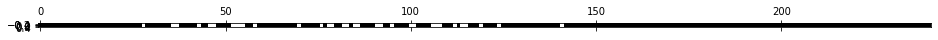

In [34]:

#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
#根据a coef_ attribute or a feature_importances_ attribute逐渐删除重要性最低的特征子集,直到特征达到指定需要个数为止
select1 = RFE(SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1), n_features_to_select=208)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)
#n_features_to_select参数设置要选择的特征数目,默认选一半

GC_df = pd.DataFrame(select1.fit_transform(X_train, y_train['Gravimetric Capacity (units)']))
print(select1.ranking_)
GC_df.to_csv('./Data/Data for svr/GC_data.csv')
# visualize the selected features:
mask1 = select1.get_support()
plt.matshow(mask1.reshape(1, -1), cmap='gray_r')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=241)
pca_test.fit(pss)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=165, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(165))

In [ ]:
pca = PCA(n_components=165)
newdata=pca.fit_transform(pss)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
outputs = np.array(df.loc[:,['Gravimetric Capacity (units)', 'Volumetric Capacity', 'Max Delta Volume']])
newdf['Gravimetric Capacity (units)'] = ss.fit_transform(outputs)[:,[0]]
newdf['Volumetric Capacity'] = ss.fit_transform(outputs)[:,[1]]
newdf['Max Delta Volume'] = ss.fit_transform(outputs)[:,[2]]

newdf.to_csv('NEWTrainingData.csv')

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  1  1  1  1  1  1  8 27  1  1  1 29  1  1  1  1  1  1 32  1  1 26 24
  1  1 20  1 31  1 21 25  1  1 30  2  1  1  1  1  1  9  1  1  5  1  1  1
  1  1 23  1  1  1  1  1 11  6  1 19 34 18 12  1  1 22  1  1  1  1  1  1
  1  1  1  1 33  1  1  1  1  1 14 35 13  1  1  1  1  1  1 28  1  1 15 10
  1  4  1  1  1  1  1  1  1  1  1  1  1  1  1  7  1 17  1  1  1 16  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


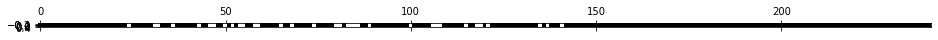

In [38]:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
#根据a coef_ attribute or a feature_importances_ attribute逐渐删除重要性最低的特征子集,直到特征达到指定需要个数为止
select2 = RFE(SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1), n_features_to_select=207)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)
#n_features_to_select参数设置要选择的特征数目,默认选一半

VC_df = pd.DataFrame(select2.fit_transform(X_train, y_train['Volumetric Capacity']))
print(select2.ranking_)
VC_df.to_csv('./Data/Data for svr/VC_data.csv')
# visualize the selected features:
mask2 = select2.get_support()
plt.matshow(mask2.reshape(1, -1), cmap='gray_r')

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 11 21  1  1 36 28  9  1  1 27  1 18  1 37  1  8
  1  1  1  1  1  1  3 12  1 22 31  1  1  1  1  1  1  1  1  1  1  1 16  1
  1  1 24 29 33  1  1 26  1  1 19 30  1 14 25 32 23  1  1  1  1  1  1  1
  1  1  1  1 10  1  1  1  1  1  1 35  1  1  1  1  1 13  4  2  1  1 17 20
  1  1  1  1  7  1 34  1  1  1  1  1 15  1  1  1  1  6  1  1  5  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


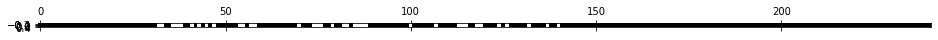

In [39]:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
#根据a coef_ attribute or a feature_importances_ attribute逐渐删除重要性最低的特征子集,直到特征达到指定需要个数为止
select3 = RFE(SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1), n_features_to_select=205)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)
#n_features_to_select参数设置要选择的特征数目,默认选一半

MDV_df = pd.DataFrame(select3.fit_transform(X_train, y_train['Max Delta Volume']))
print(select3.ranking_)
MDV_df.to_csv('./Data/Data for svr/MDV_data.csv')
# visualize the selected features:
mask3 = select3.get_support()
plt.matshow(mask3.reshape(1, -1), cmap='gray_r')

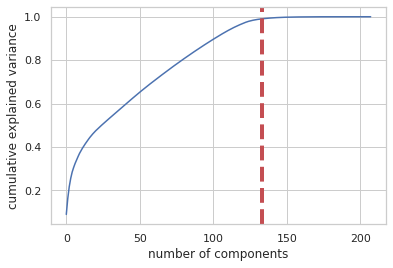

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.089059,0.089059
1,0.162496,0.073437
2,0.216434,0.053938
3,0.255022,0.038588
4,0.284225,0.029203
...,...,...
128,0.985233,0.001306
129,0.986528,0.001294
130,0.987619,0.001091
131,0.988613,0.000995


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=208)
pca_test.fit(GC_df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=133, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(133))

In [48]:
pca = PCA(n_components=133)
newdata=pca.fit_transform(GC_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('./Data/Data for svr/GC_CPA.csv')

[0.08905898 0.07343714 0.05393781 0.03858849 0.02920307 0.02130526
 0.0185541  0.01639724 0.01514084 0.01468028 0.01254635 0.01161823
 0.01071396 0.01013321 0.0098756  0.00930866 0.00921541 0.00830918
 0.00797264 0.0075935  0.00688759 0.00653566 0.00652539 0.00627866
 0.00622136 0.00613608 0.00603068 0.00599714 0.00597637 0.00591745
 0.00590451 0.0058974  0.00588137 0.00587896 0.00587733 0.00587582
 0.00587463 0.00587337 0.00586893 0.00586724 0.00586453 0.00585678
 0.0058413  0.00583559 0.00582251 0.00581651 0.00578649 0.00576023
 0.00571372 0.00569424 0.00559898 0.00554771 0.00550318 0.00546699
 0.00545247 0.00540966 0.00536863 0.00529736 0.00527503 0.00526228
 0.00523888 0.00520406 0.00518734 0.00516011 0.00515003 0.00512272
 0.00511527 0.00508774 0.00506619 0.00505925 0.00502392 0.00501786
 0.00498328 0.00496813 0.00492241 0.00489639 0.00487258 0.00484089
 0.00481781 0.00479938 0.0047865  0.00475582 0.00470582 0.00468817
 0.00467836 0.00464922 0.00461352 0.00461276 0.00456157 0.0045

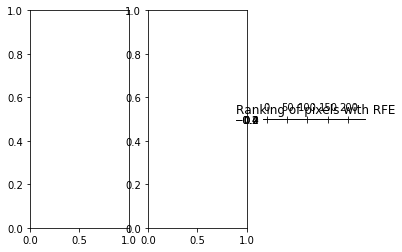

In [33]:
from sklearn.datasets import load_digits

#ranking1= select.ranking_.reshape(digits.images[0].shape)
#ranking2= select2.ranking_.reshape(digits.images[0].shape)
ranking3= select3.ranking_.reshape(1,-1)
# Plot pixel ranking
fig,ax=plt.subplots(nrows=1,ncols=3)
#ax[0].matshow(ranking1, cmap=plt.cm.Blues)
#ax[1].matshow(ranking2, cmap=plt.cm.Blues)
ax[2].matshow(ranking3, cmap=plt.cm.Blues)
#plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

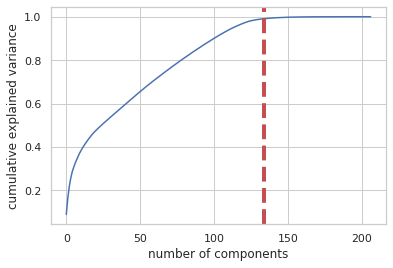

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.089425,0.089425
1,0.163124,0.073699
2,0.217256,0.054132
3,0.255978,0.038722
4,0.285267,0.029289
...,...,...
129,0.986750,0.001107
130,0.987760,0.001010
131,0.988725,0.000965
132,0.989577,0.000852


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=207)
pca_test.fit(VC_df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=134, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(134))

In [54]:
pca = PCA(n_components=134)
newdata=pca.fit_transform(VC_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('./Data/Data for svr/VC_CPA.csv')

[0.08942523 0.07369876 0.05413214 0.03872211 0.02928916 0.02137709
 0.01864974 0.01639569 0.01521721 0.01482406 0.01259719 0.01173583
 0.01062334 0.01009059 0.00984798 0.00949701 0.00907021 0.00838399
 0.00796014 0.00760984 0.00694949 0.00661289 0.0065018  0.00634464
 0.00629644 0.0061584  0.00613292 0.00601347 0.00599607 0.00593075
 0.00592554 0.00591945 0.00591704 0.00591186 0.00590408 0.00590219
 0.00590203 0.00590153 0.00589979 0.00589865 0.00589065 0.00588891
 0.00588574 0.00588047 0.0058665  0.00586449 0.00585056 0.00583896
 0.00580836 0.00575975 0.00573476 0.00569888 0.0056655  0.00559346
 0.0055253  0.00549936 0.00543926 0.00539135 0.00537749 0.00531383
 0.00529108 0.00525394 0.00524701 0.00520453 0.00518302 0.00517162
 0.00515871 0.00513438 0.00509653 0.00508368 0.0050516  0.00503713
 0.0050054  0.00496448 0.00495235 0.00492027 0.00489007 0.00484574
 0.00482864 0.00478569 0.00475796 0.00472206 0.00471007 0.00469355
 0.00468819 0.00464945 0.00462103 0.00457274 0.00456832 0.0045

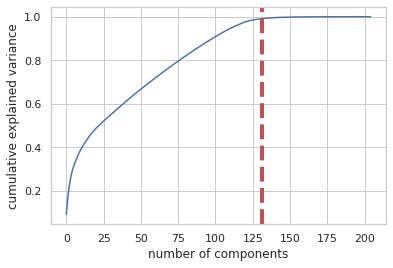

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.091507,0.091507
1,0.166968,0.075461
2,0.222375,0.055406
3,0.261995,0.039620
4,0.291967,0.029972
...,...,...
126,0.986375,0.001303
127,0.987493,0.001118
128,0.988509,0.001016
129,0.989491,0.000983


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=205)
pca_test.fit(MDV_df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=131, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(131))

In [59]:
pca = PCA(n_components=131)
newdata=pca.fit_transform(MDV_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('./Data/Data for svr/MDV_CPA.csv')

[0.09150725 0.07546101 0.05540643 0.03962032 0.02997153 0.02184714
 0.01908737 0.01684739 0.01554822 0.01515281 0.01286949 0.01206878
 0.0108762  0.0103331  0.01016148 0.00982384 0.00941467 0.00855597
 0.00818453 0.00786345 0.00713518 0.00676402 0.00671651 0.00665003
 0.00639433 0.00635815 0.00623994 0.00612762 0.00607079 0.00606047
 0.00605781 0.00604083 0.00603719 0.00602856 0.00602319 0.00601346
 0.00600441 0.00598708 0.00595317 0.00594492 0.00590236 0.00586062
 0.00583672 0.00574564 0.00569276 0.00566134 0.00560751 0.00553112
 0.00551654 0.0054765  0.00543646 0.0054051  0.00537904 0.00537452
 0.005336   0.00531752 0.00531129 0.00528001 0.00527055 0.00526871
 0.00522799 0.00520239 0.00519389 0.0051682  0.00515863 0.00509477
 0.0050784  0.00505622 0.00502336 0.00501688 0.00497205 0.00495927
 0.00493879 0.0049252  0.00490156 0.00487415 0.00484576 0.00482001
 0.00480641 0.00478377 0.00473769 0.00472493 0.00468673 0.00465656
 0.00462333 0.00460264 0.00457398 0.00455375 0.00452632 0.0045